In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers

In [9]:
dir = 'D:\\coding\\python\\computer_vision\\cap_img'

In [30]:
import os
import cv2
import numpy as np

def load_and_convert_to_gray(directory):
    image_list = []
    for filename in os.listdir(directory):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img_gray = cv2.resize(img_gray, (28, 28))  # Resize to 28x28
                image_list.append(img_gray)
    return np.array(image_list)

In [31]:
data=load_and_convert_to_gray(dir)

In [32]:
data.shape

(300, 28, 28)

In [33]:
x_train = data.reshape(data.shape[0], 28,28,1).astype('float32')

In [34]:
x_train.shape

(300, 28, 28, 1)

In [79]:
import matplotlib.pyplot as plt

In [82]:
type(data)

list

In [2]:
tf.__version__

'2.10.1'

In [2]:
(x_train, y_train),(_,_)=tf.keras.datasets.mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
import random

802


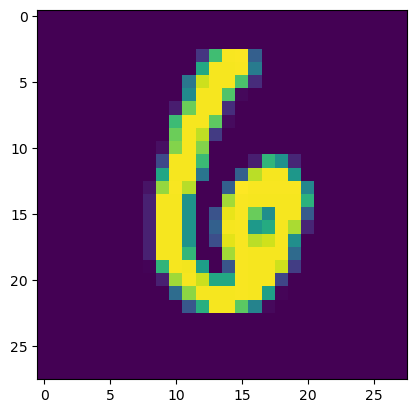

In [7]:
i = random.randint(1,6000)
print(i)
plt.imshow(x_train[i])

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype('float32')

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [35]:
x_train=(x_train-127.5)/127.5

In [36]:
x_train.max(), x_train.min()

(0.654902, -0.45882353)

In [38]:
buffer_size=300
batch_size = 32

In [39]:
buffer_size/batch_size

9.375

In [40]:
type(x_train)

numpy.ndarray

In [41]:
x_train = tf.data.Dataset.from_tensor_slices(x_train).shuffle(buffer_size).batch(batch_size)

In [42]:
type(x_train)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [43]:
x_train

<BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [44]:
def build_generator():
  network = tf.keras.models.Sequential()
  network.add(layers.Dense(units=7*7*256, use_bias=False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())
  network.add(layers.Reshape((7,7,256)))


  network.add(layers.Conv2DTranspose(filters = 128, kernel_size=(5,5), padding='same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Conv2DTranspose(filters = 64, kernel_size=(5,5), padding='same', strides=(2,2), use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Conv2DTranspose(filters=1, kernel_size=(5,5), padding='same', strides=(2,2), use_bias=False, activation='tanh'))

  network.summary()
  return network

In [45]:
Generator=build_generator()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        5

In [46]:
noise=tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0.8139363 ,  1.0762429 ,  1.3323995 , -0.798737  ,  1.884407  ,
         0.60188425, -0.9053107 , -0.63558894,  0.1444758 ,  1.6574779 ,
         0.8254396 ,  0.30880132,  1.155077  ,  0.6920018 , -0.35134375,
        -0.47944513,  0.35950062, -0.5905051 ,  2.3484    ,  0.11639404,
         0.5580902 , -0.10690282, -0.31760886,  0.5949784 , -0.12031124,
         1.4573551 ,  1.2914104 , -0.22940347, -0.4265481 ,  0.06574859,
        -1.2588403 ,  0.77876496,  0.3519686 , -0.2890147 , -0.27476016,
         0.47396207,  0.23693933,  0.12335149, -0.34146848, -0.9010075 ,
         0.24346113,  0.6894752 , -1.4098245 ,  0.1475497 , -0.37840393,
         0.04422164,  0.06671944,  0.29833055,  1.1206427 ,  0.15070325,
         2.1024642 ,  0.52115047,  0.90035325, -0.45026803, -0.66729295,
         2.2215443 ,  0.77532756, -0.69674236, -0.8752718 , -1.3224316 ,
         0.5515565 , -0.5551    , -0.75421304,  0.8627288 , -0.87406534,
 

In [47]:
generated_image=Generator(noise, training=False)

In [48]:
generated_image.shape

TensorShape([1, 28, 28, 1])

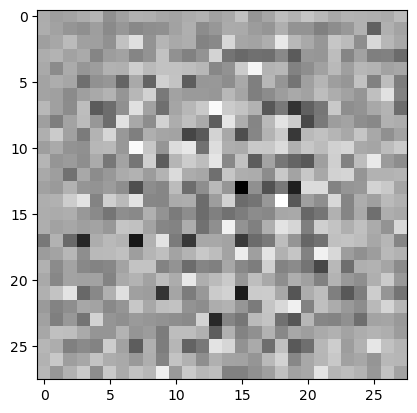

In [49]:
plt.imshow(generated_image[0,:,:,0], cmap='gray')

In [50]:
def build_discriminator():
  network = tf.keras.models.Sequential()
  network.add(layers.Conv2D(filters=64, strides=(2,2), kernel_size=(5,5), padding='same', input_shape=[28,28,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Conv2D(filters=128, strides=(2,2), kernel_size=(5,5), padding='same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())
  network.add(layers.Dense(1))
  network.summary()
  return network

In [51]:
Discriminator=build_discriminator()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

In [52]:
Discriminator.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [53]:
Discriminator(generated_image, training = False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00146702]], dtype=float32)>

In [54]:
tf.sigmoid(0.00283916)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5007098>

In [55]:
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [56]:
def discriminator_loss(expected_output, fack_output):
  real_loss=cross_entropy(tf.ones_like(expected_output), expected_output)
  fack_loss=cross_entropy(tf.zeros_like(fack_output), fack_output)
  total_loss=real_loss+fack_loss
  return total_loss

In [57]:
def generator_loss(fack_output):
  return cross_entropy(tf.ones_like(fack_output), fack_output)

In [58]:
generator_optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)
discriminator_optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)

In [72]:
epochs = 10000
noise_dimension = 100
no_of_images = 16

In [61]:
batch_size, noise_dimension

(32, 100)

In [62]:
@tf.function
def train(images):
  noise=tf.random.normal([batch_size, noise_dimension])
  with tf.GradientTape() as gen_type, tf.GradientTape() as disc_type:
    generated_images = Generator(noise, training=True)
    expected_output=Discriminator(images, training=False)
    fack_output=Discriminator(generated_images, training=True)

    gen_loss = generator_loss(fack_output)
    disc_loss = discriminator_loss(expected_output, fack_output)

  generator_gradients = gen_type.gradient(gen_loss, Generator.trainable_variables)
  discriminator_gradients = disc_type.gradient(disc_loss, Discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients, Generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients, Discriminator.trainable_variables))

In [63]:
test_images = tf.random.normal([no_of_images, noise_dimension])
test_images.shape

TensorShape([16, 100])

In [64]:
def train_gan(dataset, epochs, test_images):
  for epoch in range(epochs):
    for image_batch in dataset:
      train(image_batch)

  print('Epoch: ' , epoch + 1)
  generated_image=Generator(test_images, training = False)
  fig = plt.figure(figsize=(10,10))
  for i in range(generated_image.shape[0]):
    plt.subplot(4,4,i+1)
    plt.imshow(generated_image[i,:,:,0]*127.5+127.5, cmap='gray')
    plt.axis('off')
  plt.show()

Epoch:  10000


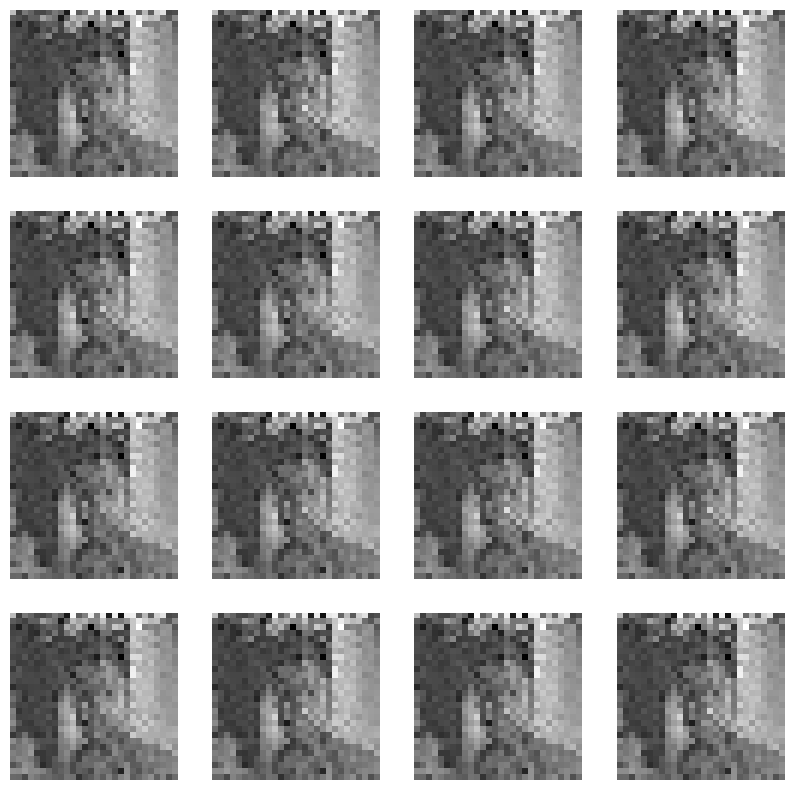

In [73]:
train_gan(x_train, epochs, test_images)